# CLUSTERING USING TFIDF -ITES

In [2]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import nltk
from sklearn.cluster import KMeans
from sklearn import metrics


In [3]:
pd.options.display.max_colwidth = 200

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malvikakarn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/malvikakarn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
df=pd.read_csv('ITES_industry.csv')

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Company_Name,Posted Date,Experience,Salaries,Location,Department,Industry,JD,Skills
0,170,170,phenix data outsourcing hiring for phenixjobs in,nov 04 2020,0 yrs,rs 3.5 9 lakh yr,navi mumbai thane ahmednagar aurangabad palghar raigad bhopal dombivali coimbatore vasai,data entry,it software,look best legitimate genuine online offline part time full time work home job india yes welcome lead field since 2000 company iso certify start 4 type home base data entry work home base data entr...,work from home work at home passive income data entry work from home part time work from home data entry part time work from home home base business data entry fun at work work from home it home b...
1,282,282,arminus,jan 09 2021,3 to 8 yrs,NaN,bhopal,sales bd,it software,job description qualification pg degree diploma market management agri market rural management specialization market mba market key skills experience minimum three years experience source market a...,food products market management food retail market management integrate brand market print brand awareness brand brand identity market sales market
2,290,290,arminus,jan 09 2021,3 to 6 yrs,NaN,bhopal,it operations edp mis,it software,job description qualification msw master degree sociology anthropology social anthropology key skills experience minimum 3 years experience development project program privilege population society...,social anthropology anthropology urban anthropology apply anthropology visual anthropology medical anthropology linguistic anthropology biological anthropology participant observation video ethnog...
3,297,297,arminus,jan 08 2021,3 to 5 yrs,NaN,bhopal,it operations edp mis,it software,job description qualification degree engineer technology premium institute mba pgdm focus entrepreneurship development key skills experience minimum 3 years experience work organization assist mic...,java automation cramer gc junit entrepreneurship development upgradation entrepreneurship entrepreneurial organizations entrepreneurship education entrepreneurial finance youth entrepreneurship cr...
4,298,298,arminus,jan 08 2021,3 to 5 yrs,NaN,bhopal,it operations edp mis,it software,job description qualification master degree economics statistics data analytics mba repute university institute key skills experience minimum 3 years experience monitor data analytics development ...,data analytics analytics dashboard monitor continuous audit continuous control monitor computer assist audit audit command language continuous monitor decision sciences xlminer alteryx me


# Prepare a Corpus
Let’s now prepare a corpus using Skills column on which we will run our cluturing analysis in this article.

A corpus is typically a collection of text documents usually belonging to one or more subjects or domains.



In [7]:
corpus = np.array(df['Skills'])

In [8]:
corpus_df = df[['Company_Name','Industry','Department','Location','Skills']]
corpus_df.head()

,Company_Name,Industry,Department,Location,Skills
0,phenix data outsourcing hiring for phenixjobs in,it software,data entry,navi mumbai thane ahmednagar aurangabad palghar raigad bhopal dombivali coimbatore vasai,work from home work at home passive income data entry work from home part time work from home data entry part time work from home home base business data entry fun at work work from home it home b...
1,arminus,it software,sales bd,bhopal,food products market management food retail market management integrate brand market print brand awareness brand brand identity market sales market
2,arminus,it software,it operations edp mis,bhopal,social anthropology anthropology urban anthropology apply anthropology visual anthropology medical anthropology linguistic anthropology biological anthropology participant observation video ethnog...
3,arminus,it software,it operations edp mis,bhopal,java automation cramer gc junit entrepreneurship development upgradation entrepreneurship entrepreneurial organizations entrepreneurship education entrepreneurial finance youth entrepreneurship cr...
4,arminus,it software,it operations edp mis,bhopal,data analytics analytics dashboard monitor continuous audit continuous control monitor computer assist audit audit command language continuous monitor decision sciences xlminer alteryx me


We need to do some data pre-processing or wrangling to remove unnecessary characters, symbols and tokens.

Simple Text Pre-processing
We will build a simple text pre-processor which focuses on removing special characters, extra whitespaces, digits, stopwords and lower casing the text corpus.

In [9]:
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['work home work home passive income data entry work home part time work home data entry part time work home home base business data entry fun work work home home base data entry boss home base online work home type',
       'food products market management food retail market management integrate brand market print brand awareness brand brand identity market sales market',
       'social anthropology anthropology urban anthropology apply anthropology visual anthropology medical anthropology linguistic anthropology biological anthropology participant observation video ethnography',
       ..., 'api php css xml net aws c cms qc ui qa ios asp sql',
       'css html javascript jquery mysql web application development ms sql sql database web application database design software architecture application development c php sql cloud design software database aspnet',
       'project management java delivery report customer relations team build client handle agile methodology category mana

# TF-IDF Model
The TF-IDF model tries to combat issue (arised by bag of vectors ),using a scaling or normalizing factor in its computation.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which uses a combination of two metrics in its computation, namely: term frequency (tf) and inverse document frequency (idf).

Mathematically, we can define TF-IDF as tfidf = tf x idf, which can be expanded further to be represented as follows.



Here, tfidf(w, D) is the TF-IDF score for word w in document D.

The term tf(w, D) represents the term frequency of the word w in document D, which can be obtained from the Bag of Words model.
The term idf(w, D) is the inverse document frequency for the term w, which can be computed as the log transform of the total number of documents in the corpus C divided by the document frequency of the word w, which is basically the frequency of documents in the corpus where the word w occurs.
1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aa,aaa,aacr,aas,ab,abap,abapoo,abaqus,abb,abbreviate,...,zoho,zone,zookeeper,zoology,zoom,zoominfo,zos,zsh,zuken,zwave
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The TF-IDF based feature vectors for each of our text documents show scaled and normalized values as compared to the raw Bag of Words model values.



# Document Similarity
Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.

Thus you can see that we can build on top of the tf-idf based features we engineered in the previous section and use them to generate new features which can be useful in domains like search engines, document clustering and information retrieval by leveraging these similarity based features.

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus if you have C documents in a corpus, you would end up with a C x C matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively.

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,12784,12785,12786,12787,12788,12789,12790,12791,12792,12793
0,1.000000,0.000000,0.0,0.000000,0.010058,0.008494,0.000000,0.000000,0.008754,0.0,...,0.000000,0.000000,0.0,0.000000,0.005630,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.0,0.000000,0.000000,0.283744,0.315711,0.007230,0.204993,0.0,...,0.014181,0.007810,0.0,0.006993,0.065917,0.000000,0.026149,0.000000,0.000000,0.028586
2,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.009522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,1.000000,0.000000,0.011863,0.038655,0.002406,0.011490,0.0,...,0.000000,0.002600,0.0,0.000000,0.003695,0.000000,0.003459,0.000000,0.007872,0.006952
4,0.010058,0.000000,0.0,0.000000,1.000000,0.000000,0.012684,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015158,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12789,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.053398,0.000000,0.000000,0.000000
12790,0.000000,0.026149,0.0,0.003459,0.015158,0.204492,0.014103,0.047498,0.049801,0.0,...,0.062453,0.012404,0.0,0.011107,0.000000,0.053398,1.000000,0.000000,0.000000,0.134421
12791,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.114846,0.000000
12792,0.000000,0.000000,0.0,0.007872,0.000000,0.036921,0.012059,0.011953,0.057073,0.0,...,0.000000,0.093420,0.0,0.000000,0.018352,0.000000,0.000000,0.114846,1.000000,0.015753


Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are as depicted in the following figure.

# Clustering using Document Similarity Features
We will use a very popular partition based clustering method, K-means clustering to cluster or group these documents based on their similarity based feature representations. In K-means clustering, we have an input parameter k, which specifies the number of clusters it will output using the document features. This clustering method is a centroid based clustering method, where it tries to cluster these documents into clusters of equal variance. It tries to create these clusters by minimizing the within-cluster sum of squares measure, also known as inertia.



In [12]:
import sklearn.cluster as cluster

In [13]:
#Preset number of cluster to 3 in order to find optimum number of cluster using Scree plot
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(similarity_matrix)

In [14]:
kmeans.labels_

array([2, 0, 2, ..., 2, 1, 0], dtype=int32)

In [15]:
kmeans.cluster_centers_

array([[0.01446185, 0.06893857, 0.00073525, ..., 0.00218865, 0.02931081,
        0.06200701],
       [0.01513755, 0.00870266, 0.00069973, ..., 0.04677578, 0.15742974,
        0.04835645],
       [0.0178164 , 0.01221358, 0.00118574, ..., 0.0236042 , 0.05093993,
        0.02260224]])

In [16]:
# Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(similarity_matrix)
    wss.append(sum(np.min(cdist(similarity_matrix, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / similarity_matrix.shape[0])


In [17]:
#Importing dependency to plot a graph
import matplotlib.pyplot as plt
%matplotlib inline

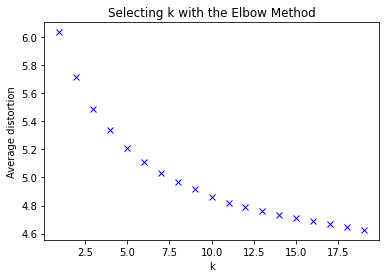

In [18]:
#Plotting scree plot
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

We will pick optimum number of k to 8

In [19]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(similarity_matrix).labels_

In [20]:
metrics.silhouette_score(similarity_matrix,labels,metric="euclidean",sample_size=10000,random_state=200)

0.11737594868958054

In [21]:
for i in range(7,11):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(similarity_matrix).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(similarity_matrix,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.11747558006331948
Silhoutte score for k= 8 is 0.11808941154982988
Silhoutte score for k= 9 is 0.12232069176429992
Silhoutte score for k= 10 is 0.12401750767599949


Let's fit the KMeans model again with K=8

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=8, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
p=pd.concat([corpus_df, cluster_labels], axis=1)

In [23]:
p.head()

,Company_Name,Industry,Department,Location,Skills,ClusterLabel
0,phenix data outsourcing hiring for phenixjobs in,it software,data entry,navi mumbai thane ahmednagar aurangabad palghar raigad bhopal dombivali coimbatore vasai,work from home work at home passive income data entry work from home part time work from home data entry part time work from home home base business data entry fun at work work from home it home b...,4
1,arminus,it software,sales bd,bhopal,food products market management food retail market management integrate brand market print brand awareness brand brand identity market sales market,2
2,arminus,it software,it operations edp mis,bhopal,social anthropology anthropology urban anthropology apply anthropology visual anthropology medical anthropology linguistic anthropology biological anthropology participant observation video ethnog...,4
3,arminus,it software,it operations edp mis,bhopal,java automation cramer gc junit entrepreneurship development upgradation entrepreneurship entrepreneurial organizations entrepreneurship education entrepreneurial finance youth entrepreneurship cr...,4
4,arminus,it software,it operations edp mis,bhopal,data analytics analytics dashboard monitor continuous audit continuous control monitor computer assist audit audit command language continuous monitor decision sciences xlminer alteryx me,4


In [23]:
#p.to_csv('bpo_ind_skill_cluster8.csv')